### Neural Networks

In [1]:
import os
import glob
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import MinMaxScaler
from tensorflow import set_random_seed

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import ModelCheckpoint

from constants import DATA_DIR
from utils import csv_concatenate, calculate_FPTS, calculate_MAE, calculate_RMSE, cross_val, load_full_dataset

Using TensorFlow backend.


In [2]:
np.random.seed(23)
set_random_seed(23)

warnings.filterwarnings("ignore")

In [47]:
def root_mean_squared_error(y_true, y_pred):
    # Custom loss function for keras
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

def get_modelcheckpoint_path(model_num):
    #Create a file path for a model and save models in hdf5 files with datetime, validation losses and epochs
    parent = DATA_DIR+"/Models/NN/Model_{}/".format(model_num)
    child = pd.Timestamp.now().strftime('%Y%m%d-%Hh%Mm') + "-model-epoch_{epoch:02d}-rmse_{val_loss:.5f}.hdf5"
    return parent + child 

def get_weights_path_and_epoch(model_num):
    filepaths = glob.glob(DATA_DIR+"/Models/NN/Model_{}/*.hdf5".format(str(model_num)))
    losses = [float(filepath[-12:-5]) for filepath in filepaths]
    epochs = losses.index(min(losses))
    print('Model {} | Lowest Valid Error: {} at Epoch {}'.format(model_num, 
                                                                 min(losses),
                                                                 epochs))
    return (filepaths[losses.index(min(losses))], epochs)

def create_model(model_num):
    def model_1():
        model = Sequential()
        model.add(Dense(X.shape[1], input_dim=X.shape[1], activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1))
        model.compile(loss=root_mean_squared_error, optimizer='adam')
        model.summary()
        return model

    def model_2():
        model = Sequential()
        model.add(Dense(X.shape[1], input_dim=X.shape[1], activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1))
        model.compile(loss=root_mean_squared_error, optimizer='adam')
        model.summary()
        return model

    def model_3():
        model = Sequential()
        model.add(Dense(X.shape[1], input_dim=X.shape[1], activation='relu'))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(256, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1))
        model.compile(loss=root_mean_squared_error, optimizer='adam')
        model.summary()
        return model
    
    if model_num == 1:
        return model_1
    elif model_num == 2:
        return model_2
    elif model_num == 3:
        return model_3
    else:
        return "invalid model_num"

In [48]:
X, y = load_full_dataset('quad')

In [34]:
# Takes about 1 hr for training 100 epochs for all models
for i in range(1, 4):
    model = KerasRegressor(build_fn=create_model(i),
                           epochs=100,
                           batch_size=32,
                           validation_split=0.2,
                           shuffle=True,
                           verbose=1)

    filepath = get_modelcheckpoint_path(i)
    checkpoint = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=False, verbose=0, mode='min')
    callbacks_list = [checkpoint]

    if i == 1:
        h1 = model.fit(X, y, callbacks=callbacks_list)
    elif i == 2:
        h2 = model.fit(X, y, callbacks=callbacks_list)
    elif i == 3:
        h3 = model.fit(X, y, callbacks=callbacks_list)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 41)                1722      
_________________________________________________________________
dense_46 (Dense)             (None, 64)                2688      
_________________________________________________________________
dense_47 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 33        
Total params: 6,523
Trainable params: 6,523
Non-trainable params: 0
_________________________________________________________________
Train on 96004 samples, validate on 24001 samples
Epoch 1/100
96004/96004 [==============================] - 12s 128us/step - loss: 9.4893 - val_loss: 9.4079
Epoch 2/100
96004/96004 [==============================] - 11s 116us/step - loss: 9.1607 - val_loss: 9.4308
Epoch 

Epoch 69/100
96004/96004 [==============================] - 8s 83us/step - loss: 8.9107 - val_loss: 9.1087
Epoch 70/100
96004/96004 [==============================] - 8s 84us/step - loss: 8.9065 - val_loss: 9.0926
Epoch 71/100
96004/96004 [==============================] - 8s 82us/step - loss: 8.8992 - val_loss: 9.1060
Epoch 72/100
96004/96004 [==============================] - 8s 83us/step - loss: 8.9010 - val_loss: 9.1286
Epoch 73/100
96004/96004 [==============================] - 9s 94us/step - loss: 8.9005 - val_loss: 9.1283
Epoch 74/100
96004/96004 [==============================] - 9s 96us/step - loss: 8.9029 - val_loss: 9.1197
Epoch 75/100
96004/96004 [==============================] - 9s 89us/step - loss: 8.8924 - val_loss: 9.1842
Epoch 76/100
96004/96004 [==============================] - 6s 64us/step - loss: 8.8967 - val_loss: 9.1039
Epoch 77/100
96004/96004 [==============================] - 7s 75us/step - loss: 8.8951 - val_loss: 9.1198
Epoch 78/100
96004/96004 [===========

96004/96004 [==============================] - 8s 81us/step - loss: 9.1766 - val_loss: 9.1412
Epoch 31/100
96004/96004 [==============================] - 10s 99us/step - loss: 9.1648 - val_loss: 9.1013
Epoch 32/100
96004/96004 [==============================] - 7s 76us/step - loss: 9.1490 - val_loss: 9.0848
Epoch 33/100
96004/96004 [==============================] - 11s 118us/step - loss: 9.1566 - val_loss: 9.2014
Epoch 34/100
96004/96004 [==============================] - 9s 90us/step - loss: 9.1409 - val_loss: 9.1110
Epoch 35/100
96004/96004 [==============================] - 9s 92us/step - loss: 9.1380 - val_loss: 9.1009
Epoch 36/100
96004/96004 [==============================] - 9s 91us/step - loss: 9.1359 - val_loss: 9.1248
Epoch 37/100
96004/96004 [==============================] - 9s 89us/step - loss: 9.1381 - val_loss: 9.1373
Epoch 38/100
96004/96004 [==============================] - 8s 79us/step - loss: 9.1271 - val_loss: 9.1276
Epoch 39/100
96004/96004 [=====================

Train on 96004 samples, validate on 24001 samples
Epoch 1/100
96004/96004 [==============================] - 19s 199us/step - loss: 9.6442 - val_loss: 9.4391
Epoch 2/100
96004/96004 [==============================] - 17s 174us/step - loss: 9.4149 - val_loss: 9.3565
Epoch 3/100
96004/96004 [==============================] - 22s 230us/step - loss: 9.3672 - val_loss: 9.3402
Epoch 4/100
96004/96004 [==============================] - 19s 198us/step - loss: 9.3433 - val_loss: 9.3283
Epoch 5/100
96004/96004 [==============================] - 19s 198us/step - loss: 9.3231 - val_loss: 9.2973
Epoch 6/100
96004/96004 [==============================] - 21s 222us/step - loss: 9.2966 - val_loss: 9.2917
Epoch 7/100
96004/96004 [==============================] - 21s 216us/step - loss: 9.2794 - val_loss: 9.2852
Epoch 8/100
96004/96004 [==============================] - 25s 260us/step - loss: 9.2479 - val_loss: 9.2205
Epoch 9/100
96004/96004 [==============================] - 21s 219us/step - loss: 9.20

Epoch 76/100
96004/96004 [==============================] - 18s 188us/step - loss: 8.9317 - val_loss: 9.1606
Epoch 77/100
96004/96004 [==============================] - 19s 195us/step - loss: 8.9347 - val_loss: 9.2009
Epoch 78/100
96004/96004 [==============================] - 19s 196us/step - loss: 8.9324 - val_loss: 9.2161
Epoch 79/100
96004/96004 [==============================] - 18s 191us/step - loss: 8.9187 - val_loss: 9.2223
Epoch 80/100
96004/96004 [==============================] - 18s 184us/step - loss: 8.9159 - val_loss: 9.1632
Epoch 81/100
96004/96004 [==============================] - 19s 196us/step - loss: 8.9190 - val_loss: 9.2774
Epoch 82/100
96004/96004 [==============================] - 20s 208us/step - loss: 8.9015 - val_loss: 9.1791
Epoch 83/100
96004/96004 [==============================] - 23s 237us/step - loss: 8.9077 - val_loss: 9.1741
Epoch 84/100
96004/96004 [==============================] - 22s 233us/step - loss: 8.9084 - val_loss: 9.1880
Epoch 85/100
96004/

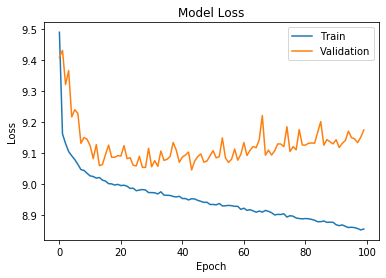

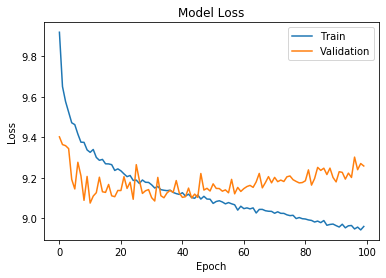

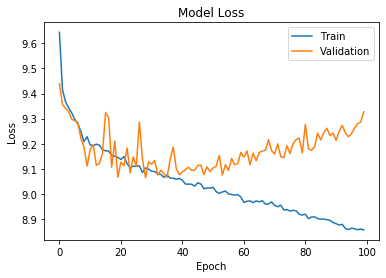

In [45]:
for i, hist in enumerate([h1, h2, h3]):
    plt.subplot(1,1,1)  
    plt.plot(hist.history['loss'])  
    plt.plot(hist.history['val_loss'])  
    plt.title('Model Loss')  
    plt.ylabel('Loss')  
    plt.xlabel('Epoch')  
    plt.legend(['Train', 'Validation'], loc='upper right')  
    plt.show()
    
# The models seem to overfit at an early stage for all models

In [70]:
for i in range(1, 4):
    weights_path, epochs = get_weights_path_and_epoch(i)
    model = KerasRegressor(build_fn=create_model(i),
                           epochs=1,
                           batch_size=32,
                           validation_split=0.2,
                           shuffle=True,
                           verbose=0)
    
    kfold = KFold(n_splits=5, shuffle=True)
    results_MSE = cross_val_score(model, X, y, cv=kfold, n_jobs=2, scoring='neg_mean_squared_error')
    print("  RMSE  | Mean: {}, SD: {}\n".format(round(np.mean(np.sqrt(-results_MSE)),5), \
                                    round(np.std(np.sqrt(-results_MSE)),5)))

Model 1 | Lowest Valid Error: 9.04445 at Epoch 28
RMSE    | Mean: 9.35576, SD: 0.0239

Model 2 | Lowest Valid Error: 9.07465 at Epoch 93
RMSE    | Mean: 9.41031, SD: 0.16444

Model 3 | Lowest Valid Error: 9.06483 at Epoch 7
RMSE    | Mean: 9.43332, SD: 0.14999

